# Project 1 -  Explore Weather Trends
by Christoph Lindstädt



## Exploring Weather Trends - Project Instructions
### Summary
In this project, you will analyze local and global temperature data and compare the temperature trends where you live to overall global temperature trends.

### Instructions
Your goal will be to create a visualization and prepare a write up describing the similarities and differences between global temperature trends and temperature trends in the closest big city to where you live. To do this, you’ll follow the steps below:

* Extract the data from the database. There's a workspace in the next section that is connected to a database. You’ll need to export the temperature data for the world as well as for the closest big city to where you live. You can find a list of cities and countries in the city_list table. To interact with the database, you'll need to write a SQL query.
    * Write a SQL query to extract the city level data. Export to CSV.
    * Write a SQL query to extract the global data. Export to CSV.
    
* Open up the CSV in whatever tool you feel most comfortable using. We suggest using Excel or Google sheets, but you are welcome to use another tool, such as Python or R.

* Create a line chart that compares your city’s temperatures with the global temperatures. Make sure to plot the moving average rather than the yearly averages in order to smooth out the lines, making trends more observable (the last concept in the previous lesson goes over how to do this in a spreadsheet).

* Make observations about the similarities and differences between the world averages and your city’s averages, as well as overall trends. Here are some questions to get you started.
    * Is your city hotter or cooler on average compared to the global average? Has the difference been consistent over time?
    * “How do the changes in your city’s temperatures over time compare to the changes in the global average?”
    * What does the overall trend look like? Is the world getting hotter or cooler? Has the trend been consistent over the last few hundred years?

## Step 1: Getting the data

First of all it is needed to check the number of rows for the "city_data" table (SQL).

```SQL
SELECT COUNT(YEAR)
FROM city_data;
```

**Output:** 71311

As long as the amount of data is not too big to download it completely, the full dataset will be queried with the * - symbol.

```SQL
SELECT *
FROM city_data;
```

Afterwards I download the *.csv to the subfolder "Data" on my computer. The same process will also be applied on the other two tables. 

```SQL
SELECT *
FROM global_data;
```

```SQL
SELECT *
FROM city_list;
```

**For the following data exploration will be used the scripting language "Python" and "Jupyter Notebook", which is coming with the "Anaconda" distribution.**

**The first step will start with importing the neccessary libraries. Afterwards the three *.csv will be laoded into separate dataframes.**

In [1]:
import warnings #to disable warnings
warnings.filterwarnings('ignore') #disables warnings

#import numpy as np 
import pandas as pd #for data processing
import matplotlib.pyplot as plt #for plotting
import seaborn as sns #for plotting
#make plots visible inside the jupyter notebook
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

from sklearn.linear_model import LinearRegression #calc the trend-data for later plots
import missingno as ms #visualize missing data

#improving the plot - quality (from: http://blog.rtwilson.com/how-to-get-nice-vector-graphics-in-your-exported-pdf-ipython-notebooks/)
from IPython.display import set_matplotlib_formats 
set_matplotlib_formats('png', 'pdf')


In [2]:
#load the datasets
df_city_data = pd.read_csv("data/city_data.csv")
df_global_data = pd.read_csv("data/global_data.csv")
df_city_list = pd.read_csv("data/city_list.csv")

## Step 2: Exploring the data

**In order to obtain some general knowledge about the dataframes, the .info() - method will be called on each one - starting with the "df_city_data" dataframe. Also it is needed to check the .head() of the dataframes to take a first look on the columns.**

In [3]:
#checking the info of the city_data dataframe
df_city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71311 entries, 0 to 71310
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      71311 non-null  int64  
 1   city      71311 non-null  object 
 2   country   71311 non-null  object 
 3   avg_temp  68764 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.2+ MB


In [4]:
#checking the head of the city_data dataframe
df_city_data.head()

,year,city,country,avg_temp
0,1849,Abidjan,Côte D'Ivoire,25.58
1,1850,Abidjan,Côte D'Ivoire,25.52
2,1851,Abidjan,Côte D'Ivoire,25.67
3,1852,Abidjan,Côte D'Ivoire,NaN
4,1853,Abidjan,Côte D'Ivoire,NaN


**The sum of the entries in the loaded dataframe equals the result of the SQL query, what means, that everything worked correctly.**

**On the other hand there is some data missing in the "avg_temp" column of the "df_city_data" dataframe. In order to plot this missing data, the matrix method out of the "missingno" library will be used.**

<AxesSubplot:>

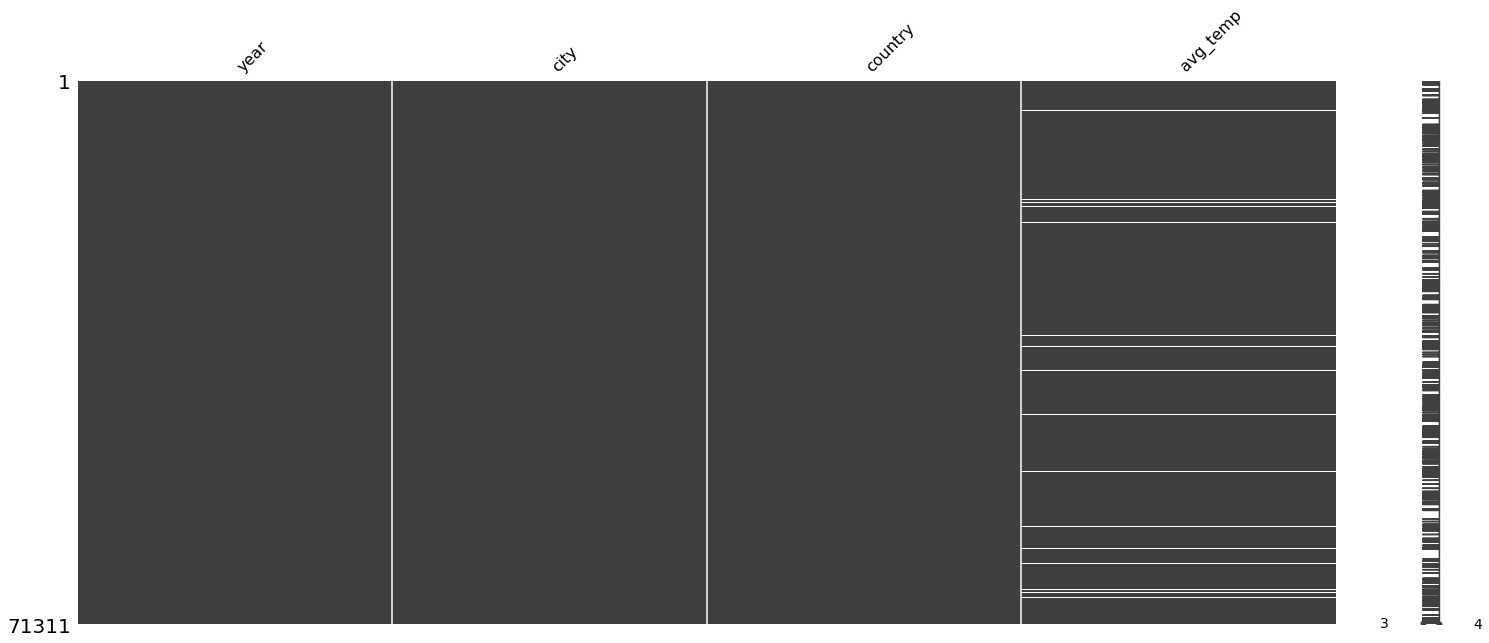

In [5]:
#plot missing values
ms.matrix(df_city_data)

**The following step will be focused on finding out how much of the data is missing and how many different countries are affected by that.**

In [6]:
#caluclate missing values in the "avg_temp" column
missing_data = df_city_data["avg_temp"].isna()
sum(missing_data)

2547

In [7]:
#calculate the number of affected unique city names
len(df_city_data[missing_data]["city"].unique())

235

**From all the data there are 2547 datapoints missing and 235 cities have missing data in the time span. In general, missing data can cause a problem because some methods and functions throw an error while getting "NaN" values. In case it will be necessary the "handling missing data" process will be applied. Before moving to the next step there should be a focus on a specific city for this data analysis. However, before applying the mentioned step, the global_data dataframe will be checked.**

In [8]:
#checking the info of the global_data dataframe
df_global_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      266 non-null    int64  
 1   avg_temp  266 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.3 KB


**It looks like there is no data missing in the global_data dataframe. In order to check whether there are some years in the data missing or not, the maximum and minimum values of the years can be used to find that out.**

In [9]:
#checking the head of the global_data dataframe
df_global_data.head()

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47


In [10]:
#calculate the mininmal values of the "year" and "avg_temp" column in the global_data dataframe
print(df_global_data["year"].min())
print(df_global_data["avg_temp"].min())

1750
5.78


In [11]:
#calculate the maximal values of the "year" and "avg_temp" column in the global_data dataframe
print(df_global_data["year"].max())
print(df_global_data["avg_temp"].max())

2015
9.83


**The maximum year is 2015, while the minimum year is 1750. That means that there is data for 265 years in "df_global_data", which on the other hand also shows that there is no year missing in between that.**

**In the following step will be choosed cities from Germany.**

In [12]:
#select the cities from germany out of the city_list dataframe
df_city_list[df_city_list["country"] == "Germany"]

,city,country
42,Berlin,Germany
113,Hamburg,Germany
214,Munich,Germany


**The first focus will lay on Berlin so a reference to the df_city_data dataframe with the condition "city" == "Berlin" will be created.**

In [13]:
#create a new reference to the city_data dataframe for the city "Berlin"
df_berlin = df_city_data[df_city_data["city"] == "Berlin"]

In [14]:
#checking the head of the Berlin dataframe
df_berlin.head()

,year,city,country,avg_temp
8990,1743,Berlin,Germany,6.33
8991,1744,Berlin,Germany,10.36
8992,1745,Berlin,Germany,1.43
8993,1746,Berlin,Germany,NaN
8994,1747,Berlin,Germany,NaN


**Now follows the "handling missing data" step mentioned earlier. The amount of missing data will be calculated and shown as a subset of the dataframe.**

In [15]:
#calcuate the sum of the missing value in the Berlin dataframe in the column "avg_temp"
sum(df_berlin["avg_temp"].isna())

4

In [16]:
#show the 4 missing values in the Berlin dataframe
df_berlin[df_berlin["avg_temp"].isna()]

,year,city,country,avg_temp
8993,1746,Berlin,Germany,NaN
8994,1747,Berlin,Germany,NaN
8995,1748,Berlin,Germany,NaN
8996,1749,Berlin,Germany,NaN


**There are four values missing. Imputations are creating false data points/bias and since our "global data" has data from 1750 - 2015 and the missing data in the "Berlin" dataframe is for years < 1750 we can also simply drop them out of the dataframe in this case.**

**In the next step the global_data dataframe and the "Berlin" dataframe will be copied. Also it will be made sure, that both dataframes fit in size (1750 - 2013) in order to compare the data better. In addition the rolling mean will be calculated with a window of 10 years (decade). This should lead to a better readable plot without losing too much information. The last step consists of resetting the index of the "Berlin" dataframe, so that the index of both dataframes also fit and the correlation can be calculated later.**

In [17]:
#create a copy of the city_data dataframe and the global_data dataframe for our needs
df_berlin = df_city_data[(df_city_data["city"] == "Berlin") & (df_city_data["year"] >= 1750)].copy()
df_global_data_plot = df_global_data[df_global_data["year"] < 2014].copy()

In [18]:
#check if both dataframe have the same length
len(df_global_data_plot) == len(df_berlin)

True

In [19]:
#setting the window for the rolling mean
avg_num = 10

#calculate the rolling mean 
df_berlin["rollingAverage"] = df_berlin["avg_temp"].rolling(window = avg_num).mean()

#reset the index of the Berlin dataframe
df_berlin.reset_index(inplace = True, drop = True)

#calculate the rolling mean for the global_data_plot dataframe
df_global_data_plot["rollingAverage"] = df_global_data_plot["avg_temp"].rolling(window = avg_num).mean()


In [20]:
#show the rows 10 to 20 of the Berlin dataframe
df_berlin[10:20]

,year,city,country,avg_temp,rollingAverage
10,1760,Berlin,Germany,8.99,8.511
11,1761,Berlin,Germany,9.47,8.483
12,1762,Berlin,Germany,8.53,8.852
13,1763,Berlin,Germany,8.62,8.842
14,1764,Berlin,Germany,8.91,8.884
15,1765,Berlin,Germany,8.54,8.912
16,1766,Berlin,Germany,8.87,8.837
17,1767,Berlin,Germany,8.14,8.736
18,1768,Berlin,Germany,8.03,8.714
19,1769,Berlin,Germany,8.46,8.656


In [21]:
#show the rows 10 to 20 of the global_data_plot dataframe
df_global_data_plot[10:20]

,year,avg_temp,rollingAverage
10,1760,7.19,7.877
11,1761,8.77,7.956
12,1762,8.61,8.239
13,1763,7.50,8.150
14,1764,8.40,8.143
15,1765,8.25,8.132
16,1766,8.41,8.088
17,1767,8.22,8.008
18,1768,6.78,8.012
19,1769,7.69,7.982


**The next steps includes plotting the data in a line plot. The rolling average will be plotted in front, so that the "raw data" behind it still visible and one can get a feeling about how the rolling mean builds up.**


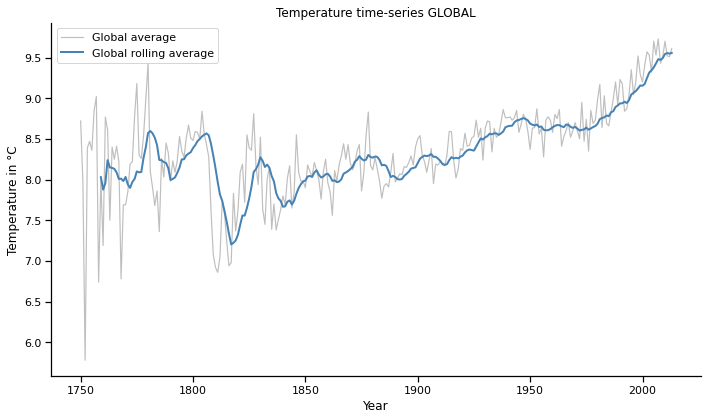

In [22]:
with sns.plotting_context("notebook"):
    #create a matplotlib figure and axes
    fig, ax = plt.subplots(figsize = (10,6))

    #plot the global data with a lineplot
    sns.lineplot(x = "year", y = "avg_temp", data = df_global_data_plot, label = "Global average", alpha = 0.5,
                 color = "grey", lw = 1.2)
    sns.lineplot(x = "year", y = "rollingAverage", data = df_global_data_plot, label = "Global rolling average",
                 color = "steelblue", lw = 2)

    #show the plot-labels in the legend
    ax.legend()
    #set the y label of the plot
    ax.set_ylabel("Temperature in °C")
    #set the x label of the plot
    ax.set_xlabel("Year")
    #set the title of the plot
    ax.set_title("Temperature time-series GLOBAL")
    #disable the right and top spine for better look
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    #tighten the plot layout
    plt.tight_layout()

    #show the plot (basically not necessary for jupyter but I always put it at the end)
    plt.show()

**Looking at this there are already five things jumping into the eye: The minimum value of "avg_temp" is a negative spike at the beginning of the time series, for some reason there is a strong drop in the average temperature between 1810 and 1830, it is clearly visible that there is a rapid uptrend starting around 1980 (it is getting hotter on earth), the maximum value for the average temperature is in 2013 (the maximum for the whole "global" dataset is in 2015) and the standard deviation is decreasing over time (which maybe comes from an increasing number of weather stations, so that each data point has a lesser weight). Speaking about the trend it looks like that around 1850 started a slight noticeble uptrend, then around 1950 there was a short stagnation and around 1980 there started a strong uptrend in the global average temperature.** 

**To confirm my assumption, the rolling standard deviation of the global avg_temp data will be plotted.**

Text(0.5, 1.0, "Rolling standard deviation for the global 'avg_temp' data")

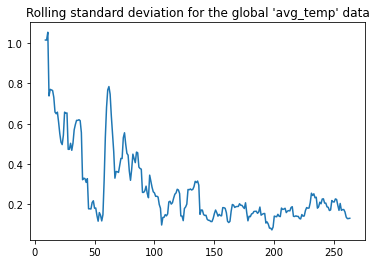

In [23]:
#calculate the rolling standard deviaton for the global_data dataframe and plot it
df_global_data_plot["avg_temp"].rolling(window = avg_num).std().plot()

#set the title for the plot
plt.title("Rolling standard deviation for the global 'avg_temp' data")

**This graph confirms that the standard deviation is decreasing. After 50 years the standard deviation was rather low, followed up by a spike, coming from the average temperature drop around 1820. In the next step, the same exploration for the "Berlin" data will be applied.**

**Because the "preparing and plotting" process will repeat often, it is useful to wrap this process up into some functions. These functions started very small and grew with ongoing exploration. To avoid repetition, the function below is the final version of it while the code-comments should explain the function further.** 

**The first functions prepares the dataframes for the chosen cities and calculates the rolling mean and the trend data. The seconds function plots the results from the first function and got several options to make the exploration more easy.**

In [24]:
def prepare_df(cities, avg_num = 10):
    """
    INPUT: cities - list of strings, city names
           avg_num - integer, window for the rolling mean

    OUTPUT: dictionary with preprocessed dataframes and citynames as key
    """    
    #create empty dict
    results = {}    
    
    #loop for all city names
    for x in cities:
        #selecting dataframe for the chosen city and years bigger or equal 1750 and smaller 2014 (for consistency)
        df_x = df_city_data[(df_city_data["city"] == x) & (df_city_data["year"] >= 1750) &
                            (df_city_data["year"] < 2014)].copy()
        
        #calculate rolling average with window = avg_num
        df_x["rollingAverage"] = df_x["avg_temp"].rolling(window = avg_num).mean()
        
        #calculating the trend
        try:
            #loading the model
            trend_model = LinearRegression()
            
            #define x and y values
            X = df_x[["year"]]
            y = df_x[["avg_temp"]]
            
            #fit the values to the model
            trend_model.fit(X, y)
            
            #predict the values with the X data to get the trend line and add it to the dataframe
            df_x["trend"] = trend_model.predict(X)
            print(f"{x} slope: {trend_model.coef_}")
                       
        except:
            #in case of NaN Values 
            print("Could not calculate trend.")
        
        finally:
            #reset the index and add the dataframe to the dictionary
            df_x.reset_index(inplace = True, drop = True)
            results[x] = df_x    
    
    for x in results:
        #print the average temperature from 1750 to 2013 for the chosen countries
        print(f'The average temperature in {x} (1750 - 2013) is: {results[x]["avg_temp"].mean():.2f} °C')
        print(f'More {x} values: Max: {results[x]["avg_temp"].max():.2f} °C; Min: {results[x]["avg_temp"].min():.2f} °C \n')
    #copy the global data for years < 2014
    df_global = df_global_data[df_global_data["year"] < 2014].copy()
    
    #caluclating the trend line as described above (I could also do this one time outside this function, but in case I 
    #would had to change the global data somehow I put it in here - also I started with the functionality to choose the timescale.)
    try:
        trend_model = LinearRegression()
        X = df_global["year"]
        trend_model.fit(X = df_global[["year"]], y = df_global[["avg_temp"]])
        trend_plot = trend_model.predict(df_global[["year"]])
        df_global["trend"] = trend_plot
        print(f"Global slope: {trend_model.coef_}")
        
    except:
        print("Error while calculating the global trend.")
        
    finally:
        
        df_global["rollingAverage"] = df_global["avg_temp"].rolling(window = avg_num).mean()    
        results["Global"] = df_global

        print(f'The global average temperature (1750 - 2013) is: {df_global["avg_temp"].mean():.2f} °C')
        print(f'More global values: Max: {df_global["avg_temp"].max():.2f} °C; Min: {df_global["avg_temp"].min():.2f} °C')
        #return the dict
        return results

def plot_results(result, fig_size = (10,6), global_plot = True, opac = 0.7, show_normal = False, trend = False):
    """
    INPUT: result - dictionary with dataframes from the function "prepare_df"
           fig_size - tuple to determine the size of the figure (width, height)
           global_plot - boolean, shows the plot of global data if set to true
           opac - float, sets the opacity for the city - data plots
           show_normal - boolean, plots also the avg_temp in addition to the rolling mean if set to true
           trend - boolean, shows the trend if set to true
    OUTPUT: plot
    """
    with sns.plotting_context("notebook"):
        #creating the figure and axes for the plot
        fig, ax = plt.subplots(figsize = fig_size)    

        #if global_plot = True shows the global data
        if global_plot:        
            sns.lineplot(x = "year", y = "rollingAverage", data = result["Global"], label = "Global", lw = 1.7)  
            #if global_plot = True shows the global trend
            if trend:
                sns.lineplot(x = "year", y = "trend", data = result["Global"], label = "Global trend")

            if show_normal:
                sns.lineplot(x = "year", y = "avg_temp", data = result["Global"], label = f"Global avg_temp", alpha = 0.5, 
                             color = "grey", lw = 1.2)

        #deletes the "Global" key-value pair in the dictionary to not double plot it    
        result.pop('Global', None)

        #plots the graph for every city-key in the dictionary
        for x in result:
            sns.lineplot(x = "year", y = "rollingAverage", data = result[x], label = x, alpha = opac)
            if show_normal:
                sns.lineplot(x = "year", y = "avg_temp", data = result[x], label = f"{x} avg_temp", alpha = 0.5, 
                             color = "grey", lw = 1.2)
            if trend:
                sns.lineplot(x = "year", y = "trend", data = result[x], label = f"{x} trend")

        #loads the legend
        ax.legend()

        #set x and y labels and the title
        ax.set_ylabel("Rolling average temperature in °C")
        ax.set_xlabel("Year")
        ax.set_title("Temperature time-series")

        #deactivate right and top spine
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        plt.tight_layout()

        #shows the plot
        plt.show()  

**Now the functions will be tested.**

Global slope: [[0.00461111]]
The global average temperature (1750 - 2013) is: 8.36 °C
More global values: Max: 9.73 °C; Min: 5.78 °C


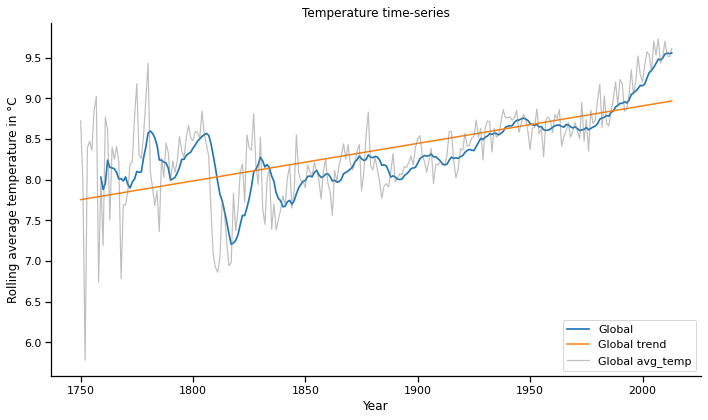

In [25]:
#creating an empty list
cities = []
#calling the newly created functions
plot_results(prepare_df(cities), global_plot=True, show_normal=True, opac = 1, trend = True)

**It worked and additional information is now visible. First of all, the global uptrend in the average temperature is clear. In addition the trend could be separated into several chunks (50 years per chunk for example) to see the different slopes of every chunk, because than it would become visible, that the average temperature is increasing a lot more faster over past 50 years than before.**

**Now the "Berlin" data graph will be analyzed.**

Berlin slope: [[0.00378471]]
The average temperature in Berlin (1750 - 2013) is: 8.92 °C
More Berlin values: Max: 10.96 °C; Min: 4.84 °C 

Global slope: [[0.00461111]]
The global average temperature (1750 - 2013) is: 8.36 °C
More global values: Max: 9.73 °C; Min: 5.78 °C


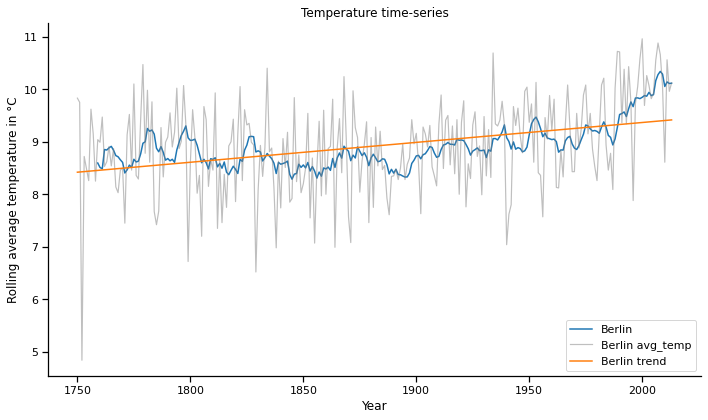

In [26]:
cities = ["Berlin"]
plot_results(prepare_df(cities), global_plot=False, show_normal=True, opac = 1, trend = True)

**The graph shows an overall slight uptrend in the average temperature for Berlin. The printed calculated numbers tell us, that the slope for the "Berlin" data is slightly lower than the global overall slope. The average temperature in Berlin is higher than the global average. While the maximum avg_temp is higher for Berlin, the minimal value for the avg_temp is higher for the global data.**

Text(0.5, 1.0, "Rolling standard deviation for the Berlin 'avg_temp' data")

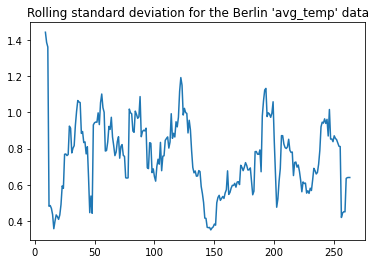

In [27]:
df_berlin["avg_temp"].rolling(window = avg_num).std().plot()
plt.title("Rolling standard deviation for the Berlin 'avg_temp' data")

**After ~150 years the standard deviation is really low, which is also visible in the first graph around 1900.**

**In the next step the Global data plot will be plotted in the same figure as the Berlin data plot to compare them.**

Berlin slope: [[0.00378471]]
The average temperature in Berlin (1750 - 2013) is: 8.92 °C
More Berlin values: Max: 10.96 °C; Min: 4.84 °C 

Global slope: [[0.00461111]]
The global average temperature (1750 - 2013) is: 8.36 °C
More global values: Max: 9.73 °C; Min: 5.78 °C


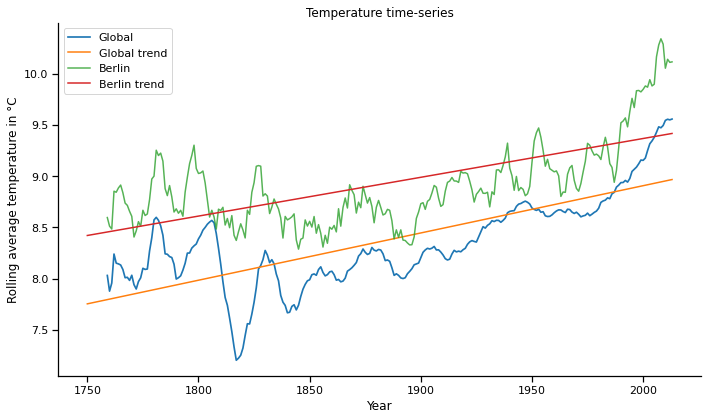

In [28]:
cities = ["Berlin"]
plot_results(prepare_df(cities), global_plot=True, show_normal=False, opac = 0.8, trend = True)

**Besides our last findings, it becomes visible, that the Berlin temperature is also affected by the strong drop in the average global temperature around 1820. At the end of the time series both of the graphs show a rather strong uptrend. Overall both graphs look highly correlated (also because of plotting the rolling mean). Also the slope of the Berlin Trend is lower than the global slope, which means that the global average temperature is increasing faster.**

**In the next step the correlation of the two graphs will be calculated to see how much they are correlated in truth.**

In [29]:
#calculating the correlation between the berlin avg_temp and the global avg_temp
df_berlin[["avg_temp"]].corrwith(df_global_data_plot["avg_temp"])

avg_temp    0.515946
dtype: float64

**With 0.52 the Berlin Data and the Global Data are moderately correlated.**

**For the further analysis the two other german cities will also be compared to the Berlin and the Global data. In the next step all the three german cities will be plotted in one figure.**


Berlin slope: [[0.00378471]]
Hamburg slope: [[0.0038572]]
Munich slope: [[0.00355448]]
The average temperature in Berlin (1750 - 2013) is: 8.92 °C
More Berlin values: Max: 10.96 °C; Min: 4.84 °C 

The average temperature in Hamburg (1750 - 2013) is: 8.33 °C
More Hamburg values: Max: 10.37 °C; Min: 4.65 °C 

The average temperature in Munich (1750 - 2013) is: 4.64 °C
More Munich values: Max: 6.64 °C; Min: 0.53 °C 

Global slope: [[0.00461111]]
The global average temperature (1750 - 2013) is: 8.36 °C
More global values: Max: 9.73 °C; Min: 5.78 °C


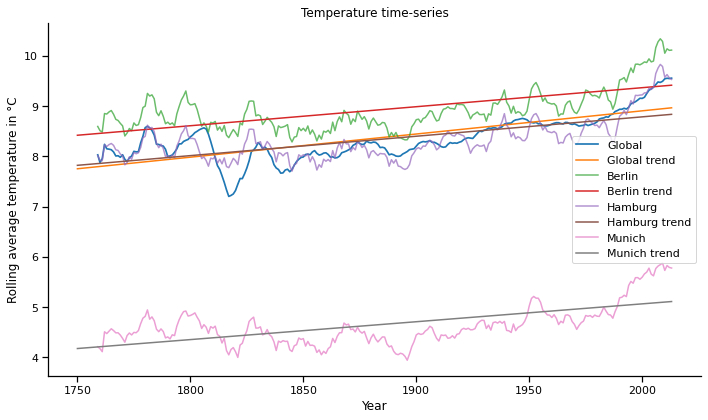

In [30]:
cities = "Berlin Hamburg Munich".split()
plot_results(prepare_df(cities), opac = 0.7, trend=True)

**As the graph shows, the warmest citiy is Berlin with 10.96 °C, followed by Hamburg with 8.33 °C. Munich is the coldest german city in this dataset with an average temperature of 4.64 °C.**

In [31]:
#getting the avg_temp data for Berlin and Munich in the year 2013
for x in ["Berlin", "Munich"]:
    print(f'{x}: {df_city_data[(df_city_data["city"] == x) & (df_city_data["year"] == 2013)]["avg_temp"]}')

Berlin: 9260    10.12
Name: avg_temp, dtype: float64
Munich: 44264    6.0
Name: avg_temp, dtype: float64


**In fact, in 2013 the avg_temp of Berlin was 10.12 °C while the avg_temp in Munich was 6 °C.**

**For the overall average temperature can be said that Munich < Hamburg < Global < Berlin. Therefore Berlin is the only german city in this dataset, which is above the average global temperature.**

**For the slope can be said that Munich < Berlin < Hamburg < Global. There it is possible to say that, considering the time from 1750 - 2013, the global temperature increased on average faster than compared to the german cities.**

**To make the comparison between the global graph and the graph of the other two german cities more visible, they will be separately plotted.**

Hamburg slope: [[0.0038572]]
The average temperature in Hamburg (1750 - 2013) is: 8.33 °C
More Hamburg values: Max: 10.37 °C; Min: 4.65 °C 

Global slope: [[0.00461111]]
The global average temperature (1750 - 2013) is: 8.36 °C
More global values: Max: 9.73 °C; Min: 5.78 °C


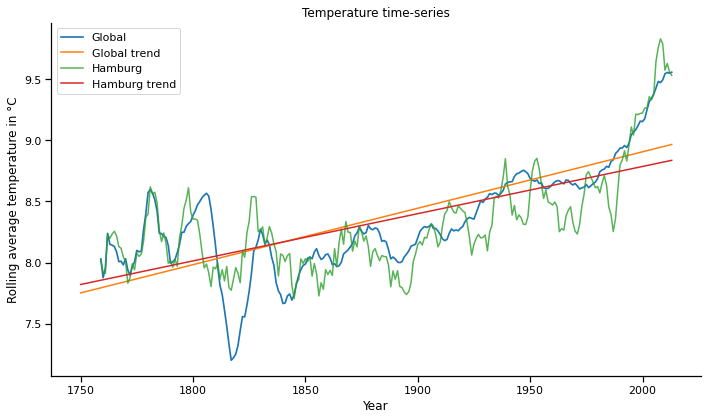

In [32]:
cities = ["Hamburg"]
plot_results(prepare_df(cities), global_plot=True, show_normal=False, opac = 0.8, trend = True)

**To conclude the graph, Hamburg is the closest to the Global dataset from the selected german cities. Between 1770 - 1800 both graphs also nearly overlap. It is again visible, that the average temperature drop around 1820 also had an effect in Hamburg.**

**Now the Berlin and Hamburg graphs will be plotted next to each other in order to compare these two cities and to find out how much they differ from each other.**

Berlin slope: [[0.00378471]]
Hamburg slope: [[0.0038572]]
The average temperature in Berlin (1750 - 2013) is: 8.92 °C
More Berlin values: Max: 10.96 °C; Min: 4.84 °C 

The average temperature in Hamburg (1750 - 2013) is: 8.33 °C
More Hamburg values: Max: 10.37 °C; Min: 4.65 °C 

Global slope: [[0.00461111]]
The global average temperature (1750 - 2013) is: 8.36 °C
More global values: Max: 9.73 °C; Min: 5.78 °C


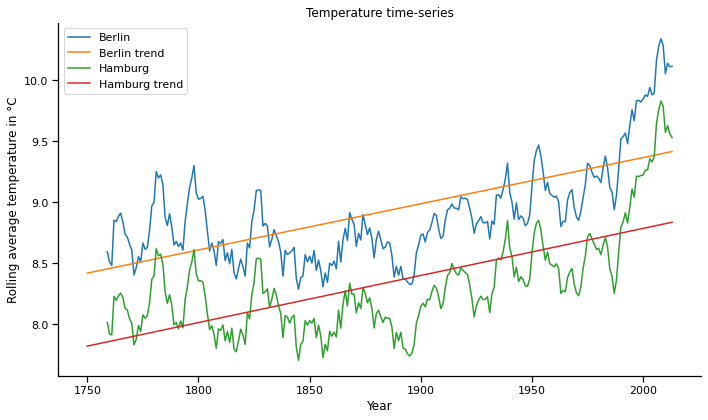

In [33]:
cities = ["Berlin", "Hamburg"]
plot_results(prepare_df(cities), global_plot=False, show_normal=False, opac = 1, trend = True)

**It is obvious that the both graphs are very similar to each other.**

In [34]:
#calculating the correlation between the Berlin avg_temp and the Hamburg avg_temp
prepare_df(["Berlin"])["Berlin"][["avg_temp"]].corrwith(prepare_df(["Hamburg"])["Hamburg"]["avg_temp"])

Berlin slope: [[0.00378471]]
The average temperature in Berlin (1750 - 2013) is: 8.92 °C
More Berlin values: Max: 10.96 °C; Min: 4.84 °C 

Global slope: [[0.00461111]]
The global average temperature (1750 - 2013) is: 8.36 °C
More global values: Max: 9.73 °C; Min: 5.78 °C
Hamburg slope: [[0.0038572]]
The average temperature in Hamburg (1750 - 2013) is: 8.33 °C
More Hamburg values: Max: 10.37 °C; Min: 4.65 °C 

Global slope: [[0.00461111]]
The global average temperature (1750 - 2013) is: 8.36 °C
More global values: Max: 9.73 °C; Min: 5.78 °C


avg_temp    0.982435
dtype: float64

**With 0.98 calculated correlation both datasets are in fact strongly correlated.**

**The last city to take a look on is Munich.**

Munich slope: [[0.00355448]]
The average temperature in Munich (1750 - 2013) is: 4.64 °C
More Munich values: Max: 6.64 °C; Min: 0.53 °C 

Global slope: [[0.00461111]]
The global average temperature (1750 - 2013) is: 8.36 °C
More global values: Max: 9.73 °C; Min: 5.78 °C


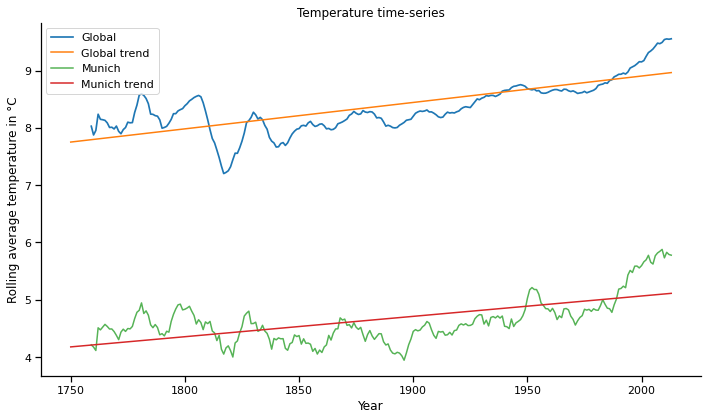

In [35]:
cities = ["Munich"]
plot_results(prepare_df(cities), global_plot=True, show_normal=False, opac = 0.8, trend = True)

**The already for the other graps mentioned average temperature drop around 1820 is also visible for Munich. In the next step the Munich graph will also be compared to the Berlin graph.**

Berlin slope: [[0.00378471]]
Munich slope: [[0.00355448]]
The average temperature in Berlin (1750 - 2013) is: 8.92 °C
More Berlin values: Max: 10.96 °C; Min: 4.84 °C 

The average temperature in Munich (1750 - 2013) is: 4.64 °C
More Munich values: Max: 6.64 °C; Min: 0.53 °C 

Global slope: [[0.00461111]]
The global average temperature (1750 - 2013) is: 8.36 °C
More global values: Max: 9.73 °C; Min: 5.78 °C


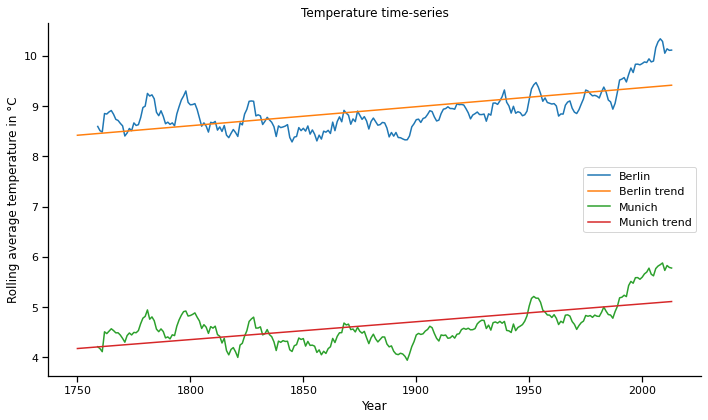

In [36]:
cities = ["Berlin", "Munich"]
plot_results(prepare_df(cities), global_plot=False, show_normal=False, opac = 1, trend = True)

In [37]:
#calculating the correlation between the Berlin avg_temp and the Munich avg_temp
prepare_df(["Berlin"])["Berlin"][["avg_temp"]].corrwith(prepare_df(["Munich"])["Munich"]["avg_temp"])

Berlin slope: [[0.00378471]]
The average temperature in Berlin (1750 - 2013) is: 8.92 °C
More Berlin values: Max: 10.96 °C; Min: 4.84 °C 

Global slope: [[0.00461111]]
The global average temperature (1750 - 2013) is: 8.36 °C
More global values: Max: 9.73 °C; Min: 5.78 °C
Munich slope: [[0.00355448]]
The average temperature in Munich (1750 - 2013) is: 4.64 °C
More Munich values: Max: 6.64 °C; Min: 0.53 °C 

Global slope: [[0.00461111]]
The global average temperature (1750 - 2013) is: 8.36 °C
More global values: Max: 9.73 °C; Min: 5.78 °C


avg_temp    0.903686
dtype: float64

**With a calculated correlation of 0.90 between the Berlin and the Munich data, they are also highly correlated to each other.**

**In case the city names are not unique, a unique key - created out of the city + country name - has to be created and used.**

In [38]:
#check for duplicates among the city column
cities = df_city_data.groupby(["city", "country"], as_index = False).count()["city"]
cities[cities.duplicated()]

10        Alexandria
34         Barcelona
46        Birmingham
72           Colombo
126        Hyderabad
157         Kingston
164           La Paz
175           London
178      Los Angeles
281         Santiago
282         Santiago
284    Santo Domingo
324         Valencia
Name: city, dtype: object

**Since there are duplicates among the city names, the new key will be created in the next step.**

In [39]:
#creating the key by joining the city and country column
df_city_data["key"] = df_city_data[["city", "country"]].apply(lambda x: " - ".join(x), axis=1)

In [40]:
df_city_data.head()

,year,city,country,avg_temp,key
0,1849,Abidjan,Côte D'Ivoire,25.58,Abidjan - Côte D'Ivoire
1,1850,Abidjan,Côte D'Ivoire,25.52,Abidjan - Côte D'Ivoire
2,1851,Abidjan,Côte D'Ivoire,25.67,Abidjan - Côte D'Ivoire
3,1852,Abidjan,Côte D'Ivoire,NaN,Abidjan - Côte D'Ivoire
4,1853,Abidjan,Côte D'Ivoire,NaN,Abidjan - Côte D'Ivoire


**Now the unique key is created and will be used to calculate the correlation for all the cities.**

In [41]:
def calc_corr(cities, startYear):
    """
    INPUTS: cities - list of strings; city names
            startYear - integer; year to start calculating the correlation from
    OUTPUTS: dictionary with correlation values and the key as index
    """
    #creating an empty dictionary
    corr = {}    
    
    for x in cities:
        #selecting and copying the correct dataframe given different conditions
        df_x = df_city_data[(df_city_data["key"] == x) & (df_city_data["year"] >= startYear) & (df_city_data["year"] <= 2015)].copy()
        #reset the index to align the index of both dataframes
        df_x.reset_index(inplace = True)
        #calculate the correlation and add the result to the dictionary
        corr[x] = df_x[["avg_temp"]].corrwith(df_global_data["avg_temp"], axis = 0)
        
    #return the dictionary    
    return corr

In [42]:
corr_all = calc_corr(df_city_data["key"].unique(), 1750)
df_corr = pd.DataFrame(corr_all)
df_corr = df_corr.transpose().sort_values("avg_temp", ascending = False)
df_corr.reset_index(inplace = True)
df_corr["city"] = df_corr["index"].apply(lambda x: x.split(" - ")[0])
df_corr["country"] = df_corr["index"].apply(lambda x: x.split(" - ")[1])
df_corr.set_index("city", inplace = True)

In [43]:
df_corr.head()

,index,avg_temp,country
city,,,
Ufa,Ufa - Russia,0.763481,Russia
Tunis,Tunis - Tunisia,0.739872,Tunisia
Valencia,Valencia - Spain,0.721943,Spain
Montreal,Montreal - Canada,0.721534,Canada
Ottawa,Ottawa - Canada,0.718663,Canada


In [44]:
#choosing the german cities out of the new dictionary
print(df_corr.loc[["Berlin", "Hamburg", "Munich"]]["avg_temp"])
#print(sum(df_city_data[df_city_data["city"] == "Munich"]["avg_temp"].isna()))

city
Berlin     0.515946
Hamburg    0.512275
Munich     0.559655
Name: avg_temp, dtype: float64


**Munich results as the highest correlation to the global data among german cities. In order to finish this analysis the most positive, the most negative and the least correlated cities will be reasearched.**

In [45]:
df_corr[["avg_temp", "country"]].head(5)

,avg_temp,country
city,,
Ufa,0.763481,Russia
Tunis,0.739872,Tunisia
Valencia,0.721943,Spain
Montreal,0.721534,Canada
Ottawa,0.718663,Canada


In [46]:
df_corr[["avg_temp", "country"]][df_corr["avg_temp"] < 0.01].head(5)

,avg_temp,country
city,,
Ouagadougou,0.005583,Burkina Faso
Lagos,0.002495,Nigeria
Luanda,0.001921,Angola
Maseru,0.001244,Lesotho
Monrovia,-0.001666,Liberia


In [47]:
df_corr[["avg_temp", "country"]].tail(5)

,avg_temp,country
city,,
Asmara,-0.083861,Eritrea
Guayaquil,-0.088970,Ecuador
Harare,-0.095168,Zimbabwe
Maiduguri,-0.103415,Nigeria
Kano,-0.115508,Nigeria


**The highest positive correlation: Ufa (Russia); 0.76.**

**The highest negative correlation: Kano (Nigeria); -0.12.**

**The least correlation: Maseru (Lesotho); 0.001244.**

**Without going to much in-depth, the data for the mentioned cities will also be plotted.**

Could not calculate trend.
Maseru slope: [[0.0080434]]
Could not calculate trend.
The average temperature in Ufa (1750 - 2013) is: 1.81 °C
More Ufa values: Max: 5.00 °C; Min: -5.96 °C 

The average temperature in Maseru (1750 - 2013) is: 14.04 °C
More Maseru values: Max: 15.34 °C; Min: 13.02 °C 

The average temperature in Kano (1750 - 2013) is: 26.12 °C
More Kano values: Max: 27.76 °C; Min: 22.60 °C 

Global slope: [[0.00461111]]
The global average temperature (1750 - 2013) is: 8.36 °C
More global values: Max: 9.73 °C; Min: 5.78 °C


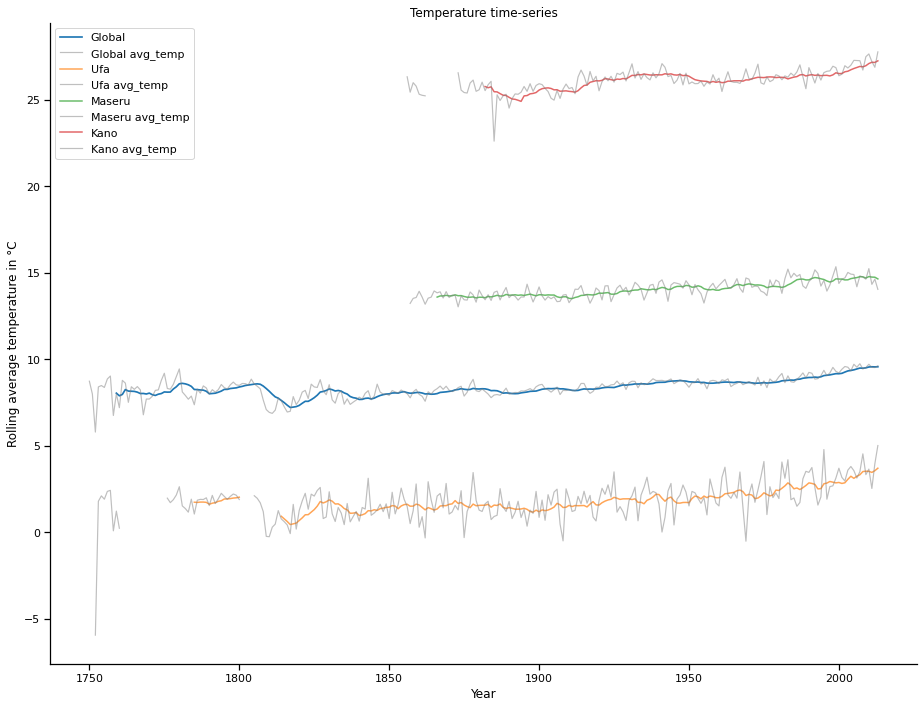

In [48]:
cities = ["Ufa", "Maseru", "Kano"]
plot_results(prepare_df(cities), (13,10), show_normal=True)

Could not calculate trend.
The average temperature in Ufa (1750 - 2013) is: 1.81 °C
More Ufa values: Max: 5.00 °C; Min: -5.96 °C 

Global slope: [[0.00461111]]
The global average temperature (1750 - 2013) is: 8.36 °C
More global values: Max: 9.73 °C; Min: 5.78 °C


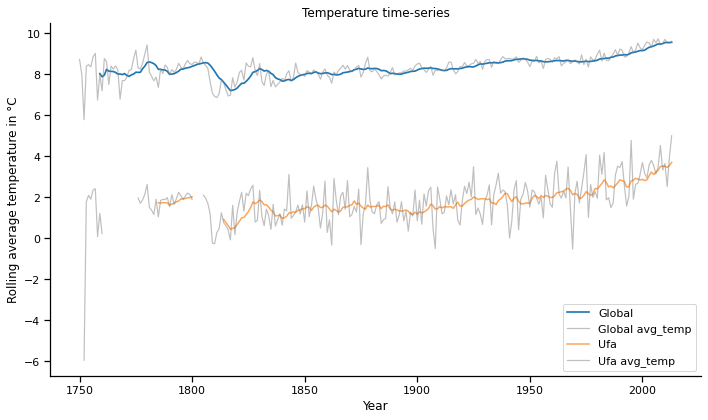

In [49]:
cities = ["Ufa"]
plot_results(prepare_df(cities), show_normal=True)

Maseru slope: [[0.0080434]]
The average temperature in Maseru (1750 - 2013) is: 14.04 °C
More Maseru values: Max: 15.34 °C; Min: 13.02 °C 

Global slope: [[0.00461111]]
The global average temperature (1750 - 2013) is: 8.36 °C
More global values: Max: 9.73 °C; Min: 5.78 °C


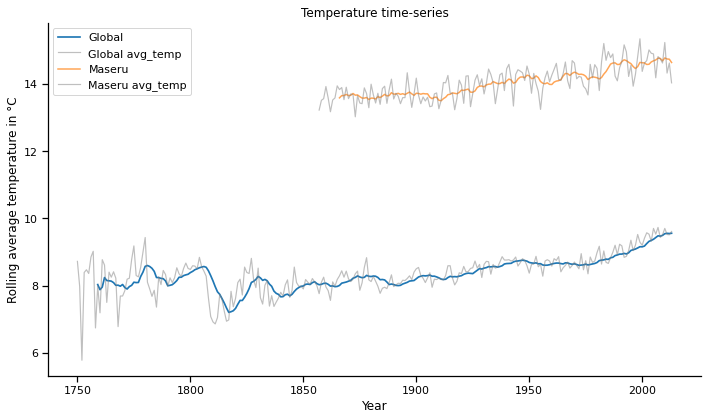

In [50]:
cities = ["Maseru"]
plot_results(prepare_df(cities), show_normal=True)

Could not calculate trend.
The average temperature in Kano (1750 - 2013) is: 26.12 °C
More Kano values: Max: 27.76 °C; Min: 22.60 °C 

Global slope: [[0.00461111]]
The global average temperature (1750 - 2013) is: 8.36 °C
More global values: Max: 9.73 °C; Min: 5.78 °C


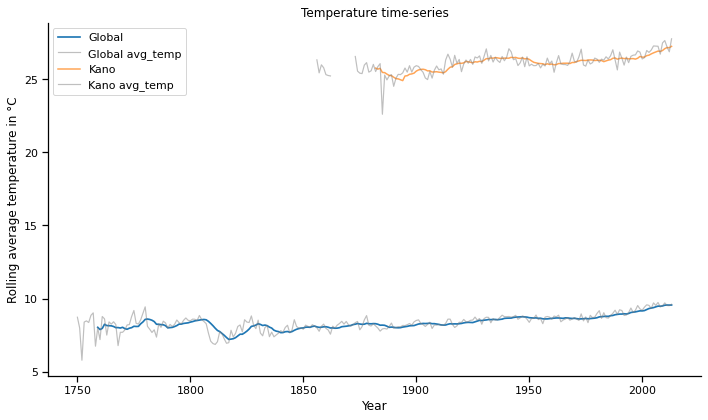

In [51]:
cities = ["Kano"]
plot_results(prepare_df(cities), show_normal=True)

**A quick analysis of these cities:**

* For these cities exist less datapoints than there are for the global data; Order of the number of existing data: **Kano < Maseru < Ufa < Global**

* For the average temperature in each country following can be stated: **Ufa < Global < Maseru < Kano**

* At the end of the time series of each city (atleast ~2000) there is an uptrend visible (despite the fact that the real trend cannot be calculated with the current function)

## Step 3: Conclusion

**To conclude, there is a clear overall uptrend visible, what means, that the average global temperature is increasing, with an also increasing tempo.**

The german cities Hamburg, Berlin and Munich got compared to the global data (1750 - 2013):
* the slope of the global trend is higher than compared to the german cities, so the global average temperature is increasing faster (looking at this long time period)
* Berlin has the highest average temperature among the german cities, making Berlin the only city that has a higher average temperature than the global
* Hamburg is the closest to the global average temperature, while Munich has the lowest average temperature, but also the highest correlation to the global data compared to the other two german cities

